# **MDSC-102-LAB-TEST**

###***NAME  - Thilak D***

###***Reg no - 23913***

**Importing the drive drive for accessing the data set**

In [61]:
#form google drive importing the contents
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the important libraries**

In [62]:
import numpy as np #Import NumPy for array manipulation
import pandas as pd #Import Pandas for data manipulation
import matplotlib.pyplot as plt #Import Matplotlib for 2D plots and visualizations
import seaborn as sns #Import Seaborn for data visualizations
import scipy as sp
from scipy import stats

**Importing dataset from google drive**

In [63]:
#importing data using pandas
df = pd.read_csv("/content/drive/MyDrive/MDSC/1 semester/102/lap_test_102/train.csv")

# **ABOUT THE DATA SET**
## **Air pollution**

*Air pollution is a major global issue that affects the health and well-being of millions of people. The Air Quality Index (AQI) is a widely-used measure of air pollution that provides information on the quality of air in a city on a daily basis.*

*The AQI is divided into six levels of air quality, ranging from "good" to "hazardous".*

1.   **Good (0-50)** - This indicates minimal impact.
2.   **Satisfactory (51-100)** - This category can cause minor breathing difficulties in susceptible individuals.
3.   **Moderately polluted (101-200)** - This category can cause breathing difficulties in people with lung diseases, such as asthma, as well as discomfort for heart disease patients, children, and older adults.
4.   **Poor (201-300)** - This category can cause breathing difficulties in people who are exposed to it for prolonged periods, as well as discomfort for individuals with heart disease.
5.   **Very Poor (301-400)** - This category can cause respiratory illness in people who are exposed to it for prolonged periods.
6.   **Severe (401-500)** - This category can cause respiratory issues in otherwise healthy people, and may result in very severe health problems for those with lung or heart disease.
7.   **Very Severe (500 and above)** - This category is considered uninhabitable.

In [64]:
df.info() # info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495512 entries, 0 to 495511
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        495512 non-null  object 
 1   Datetime    495512 non-null  object 
 2   PM2.5       488851 non-null  float64
 3   PM10        484693 non-null  float64
 4   NO          469994 non-null  float64
 5   NO2         489898 non-null  float64
 6   NOx         485090 non-null  float64
 7   NH3         474977 non-null  float64
 8   CO          490495 non-null  float64
 9   SO2         483354 non-null  float64
 10  O3          471898 non-null  float64
 11  Benzene     486993 non-null  float64
 12  Toluene     484508 non-null  float64
 13  Xylene      483352 non-null  float64
 14  AQI_Bucket  495512 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 56.7+ MB


In [65]:
df.head(20) # displying first 20 data sets

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Jaipur,2019-05-04 01:00:00,60.8,91.5,41.6,37.3,66.7,27.0,1.0,10.5,26.9,2.0,7.6,3.1,5
1,Amritsar,2017-04-27 19:00:00,23.8,119.1,14.9,17.1,NaN,28.4,0.0,6.7,19.1,3.1,8.7,3.1,5
2,Amaravati,2018-11-12 10:00:00,93.8,182.0,5.5,63.9,NaN,1.8,1.3,23.1,41.7,0.1,0.6,3.1,5
3,Kochi,2020-06-19 09:00:00,16.0,26.9,17.4,0.9,0.0,23.6,1.6,27.4,34.8,3.1,0.0,3.1,5
4,Ahmedabad,2019-05-16 03:00:00,29.5,138.4,NaN,31.6,26.0,23.6,9.3,NaN,36.9,14.5,86.8,11.5,1
5,Lucknow,2020-06-04 05:00:00,91.7,119.1,10.5,9.2,14.0,13.0,1.2,5.5,31.9,NaN,1.7,3.1,3
6,Thiruvananthapuram,2019-05-02 09:00:00,39.2,95.5,0.9,3.5,2.6,2.8,1.2,1.8,46.6,3.1,8.7,3.1,1
7,Talcher,2019-06-08 08:00:00,41.4,89.4,37.0,2.3,39.3,8.2,0.8,23.5,2.4,0.0,8.7,3.1,1
8,Guwahati,2020-02-08 19:00:00,175.8,309.9,49.4,37.5,121.3,18.2,1.2,12.4,18.2,1.5,8.7,3.1,4
9,Lucknow,2020-03-01 17:00:00,48.6,119.1,3.6,17.8,12.4,19.9,1.2,4.8,66.0,17.0,16.6,3.1,5


# **Data preproccessing**

In [66]:
df.isnull().sum() # count null values

City              0
Datetime          0
PM2.5          6661
PM10          10819
NO            25518
NO2            5614
NOx           10422
NH3           20535
CO             5017
SO2           12158
O3            23614
Benzene        8519
Toluene       11004
Xylene        12160
AQI_Bucket        0
dtype: int64

In [67]:
df['Datetime'] = pd.to_datetime(df['Datetime']) # chaning to dattome datatype

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495512 entries, 0 to 495511
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        495512 non-null  object        
 1   Datetime    495512 non-null  datetime64[ns]
 2   PM2.5       488851 non-null  float64       
 3   PM10        484693 non-null  float64       
 4   NO          469994 non-null  float64       
 5   NO2         489898 non-null  float64       
 6   NOx         485090 non-null  float64       
 7   NH3         474977 non-null  float64       
 8   CO          490495 non-null  float64       
 9   SO2         483354 non-null  float64       
 10  O3          471898 non-null  float64       
 11  Benzene     486993 non-null  float64       
 12  Toluene     484508 non-null  float64       
 13  Xylene      483352 non-null  float64       
 14  AQI_Bucket  495512 non-null  int64         
 15  Year        495512 non-null  int64         
 16  Mo

In [69]:
# count the cities count
city={}
for col in df['City']:
  if col in city:
    city[col] += 1
  else:
    city[col] = 0
city

{'Jaipur': 18600,
 'Amritsar': 20503,
 'Amaravati': 15887,
 'Kochi': 2699,
 'Ahmedabad': 33662,
 'Lucknow': 33699,
 'Thiruvananthapuram': 18650,
 'Talcher': 15461,
 'Guwahati': 8347,
 'Delhi': 33730,
 'Chandigarh': 5051,
 'Visakhapatnam': 24572,
 'Gurugram': 28178,
 'Mumbai': 33791,
 'Bengaluru': 33677,
 'Coimbatore': 6478,
 'Brajrajnagar': 15645,
 'Hyderabad': 33660,
 'Chennai': 33853,
 'Patna': 31254,
 'Kolkata': 13731,
 'Bhopal': 4911,
 'Jorapokhar': 19682,
 'Aizawl': 1856,
 'Shillong': 5164,
 'Ernakulam': 2745}

Text(0.5, 1.0, 'City count')

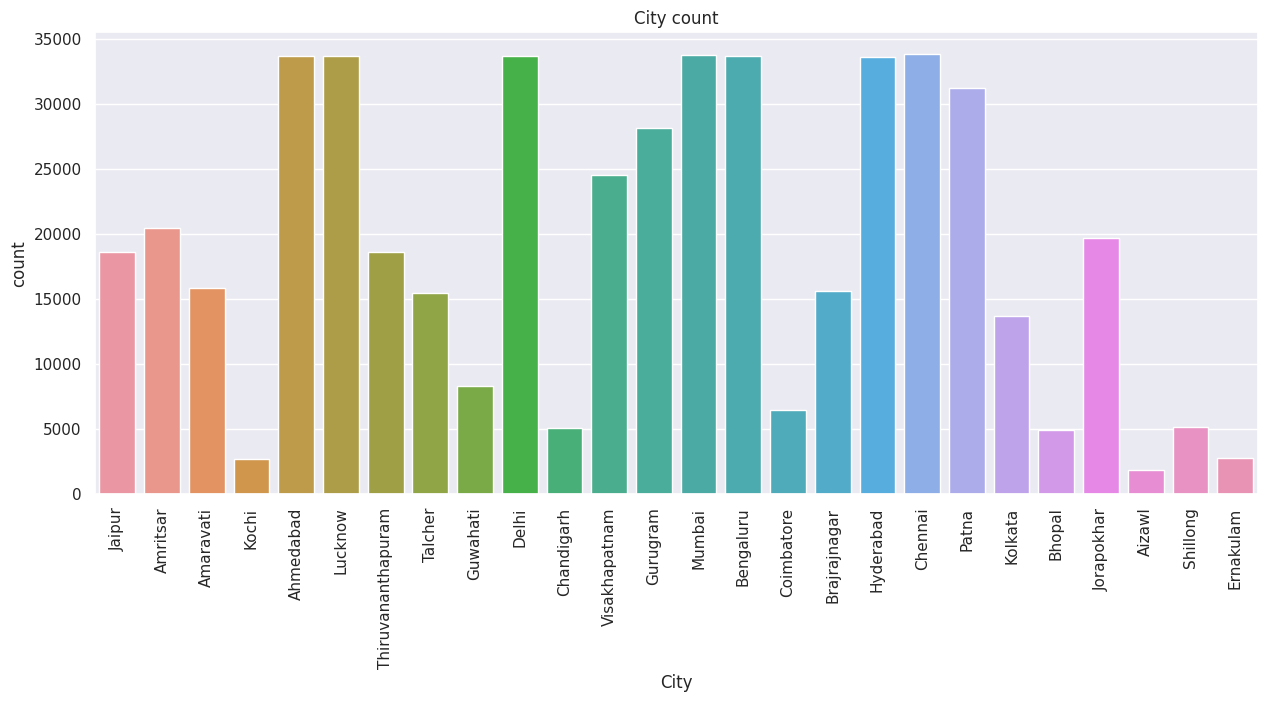

In [70]:
#ploting the count of cities
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
sns.countplot(x=df['City']).set_title('City count')

In [71]:
#in that cities count and number of NUll values are there in NO2
for col in city:
  null_count = df[df['City'] == col]['NO2'].isnull().sum()
  print(col,'total count',(30-len(col)-10)*' ',city[col],'Missing value of NO2',null_count)

Jaipur total count                18600 Missing value of NO2 192
Amritsar total count              20503 Missing value of NO2 215
Amaravati total count             15887 Missing value of NO2 177
Kochi total count                 2699 Missing value of NO2 31
Ahmedabad total count             33662 Missing value of NO2 391
Lucknow total count               33699 Missing value of NO2 414
Thiruvananthapuram total count    18650 Missing value of NO2 221
Talcher total count               15461 Missing value of NO2 180
Guwahati total count              8347 Missing value of NO2 88
Delhi total count                 33730 Missing value of NO2 403
Chandigarh total count            5051 Missing value of NO2 60
Visakhapatnam total count         24572 Missing value of NO2 280
Gurugram total count              28178 Missing value of NO2 317
Mumbai total count                33791 Missing value of NO2 407
Bengaluru total count             33677 Missing value of NO2 401
Coimbatore total count         

In [72]:
def fill_with_mean(group): #function to get the mean
    mean = group.mode().iloc[0]
    return group.fillna(mean)

In [73]:
# Fill missing values with mode for each column within their respective city
df = df.groupby('City',group_keys=True).apply(fill_with_mean).reset_index(drop=True)


The reset_index() method is used to reset the index of a DataFrame after performing certain operations, like groupby(). Whether or not to use reset_index() and whether to set it to True or False depends on your specific requirements.

reset_index(True) (default): This will reset the index and add a new column to the DataFrame with the old index values. This is useful when you want to keep the old index information as a regular column in your DataFrame.

reset_index(False) (or reset_index() without an argument): This will reset the index and discard the old index values. This is useful when you want to completely replace the old index with a new default integer index.

The apply() method in Pandas is used to apply a function along an axis of a DataFrame or a Series

for variables related to air pollutants (e.g., PM2.5, PM10, NO, NO2, NOx, CO, SO2, O3, Benzene, Toluene, Xylene), it's more appropriate to fill missing values with the mean, as these are continuous numerical measurements. Filling with the mean will preserve the overall statistical characteristics of the data.

In [74]:
df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI_Bucket    0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

# **DATA Visvalization**

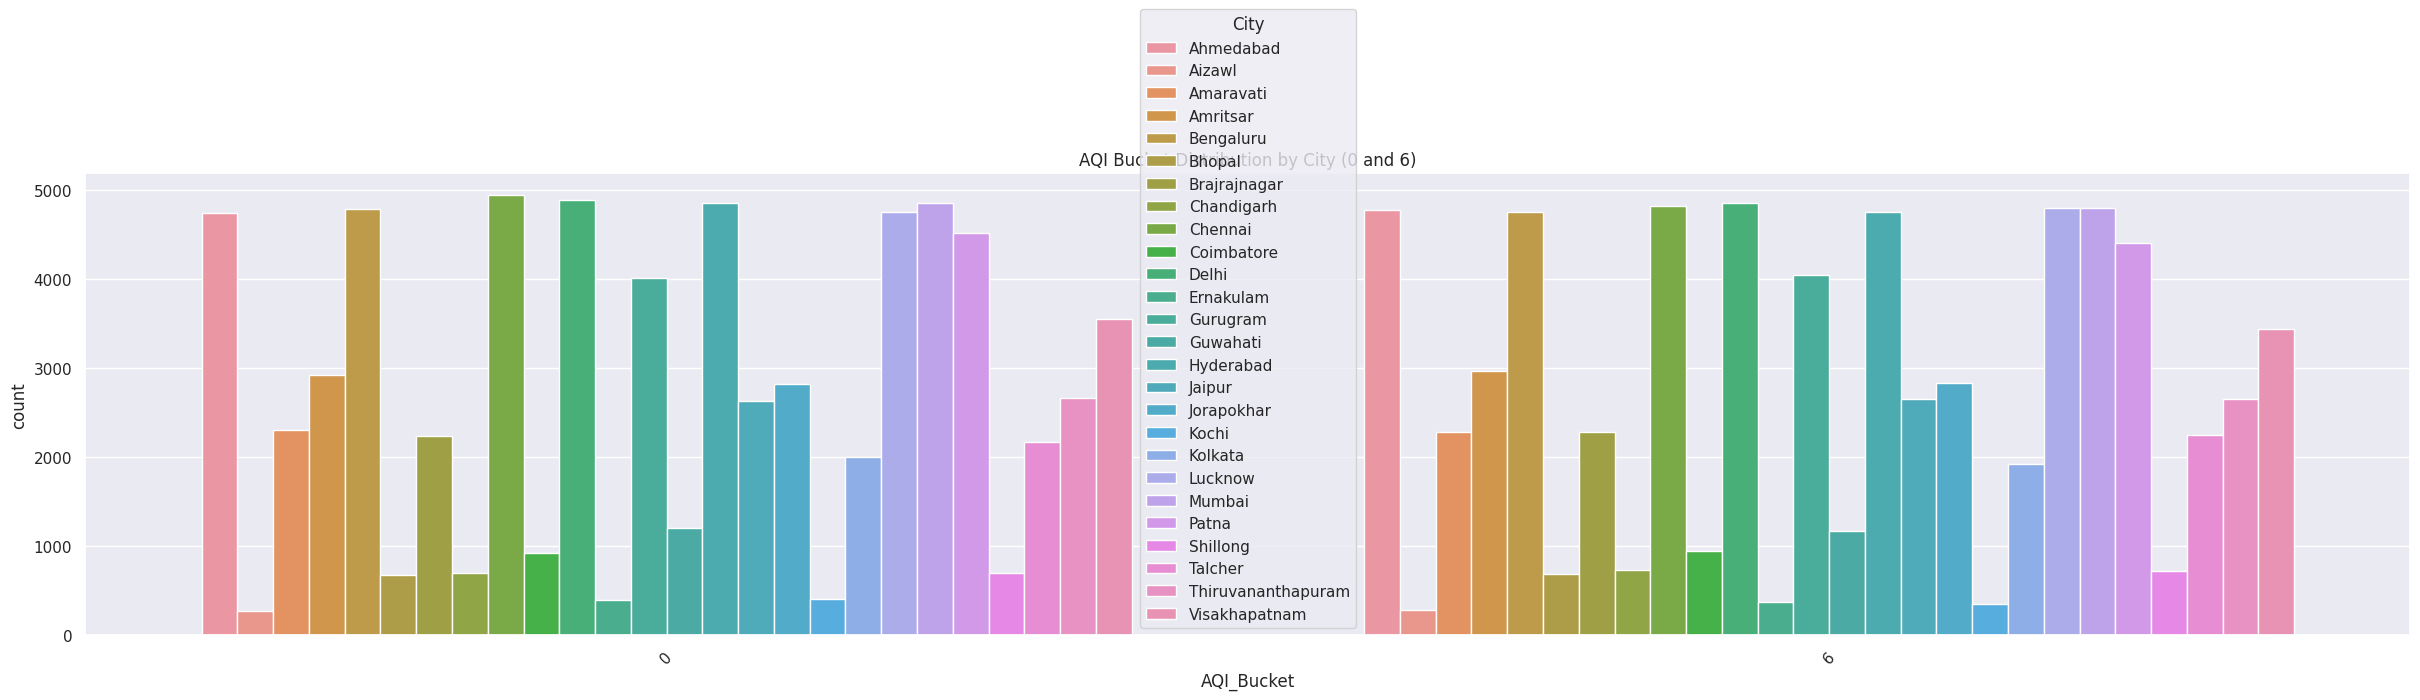

In [75]:
filtered_df = df[df['AQI_Bucket'].isin([0, 6])]

# Create a count plot to show the distribution of AQI_Bucket by City
plt.figure(figsize=(30, 6))  # Set the figure size
sns.countplot(data=filtered_df, x='AQI_Bucket', hue='City', order=filtered_df['AQI_Bucket'].value_counts().index)
plt.title('AQI Bucket Distribution by City (0 and 6)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [76]:
# Count the occurrences of each city for AQI_Bucket values '0' and '6'
city_counts = filtered_df.groupby(['AQI_Bucket', 'City'])['City'].count().unstack(fill_value=0)

# Find the top three cities in AQI_Bucket '0' and '6'
top_cities_0 = city_counts.loc[0].nlargest(3)
top_cities_6 = city_counts.loc[6].nlargest(3)

# Print the counts
print("Top 3 Cities in AQI Bucket 0:")
print(top_cities_0)

print("\nTop 3 Cities in AQI Bucket 6:")
print(top_cities_6)

Top 3 Cities in AQI Bucket 0:
City
Chennai      4939
Delhi        4892
Hyderabad    4853
Name: 0, dtype: int64

Top 3 Cities in AQI Bucket 6:
City
Delhi      4860
Chennai    4825
Mumbai     4799
Name: 6, dtype: int64


In [77]:
entities = 10
# Group the data by 'City'
df = df.groupby('City', group_keys=False).apply(lambda x: x.sample(n=entities, random_state=1))
df.reset_index(drop=True, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        260 non-null    object        
 1   Datetime    260 non-null    datetime64[ns]
 2   PM2.5       260 non-null    float64       
 3   PM10        260 non-null    float64       
 4   NO          260 non-null    float64       
 5   NO2         260 non-null    float64       
 6   NOx         260 non-null    float64       
 7   NH3         260 non-null    float64       
 8   CO          260 non-null    float64       
 9   SO2         260 non-null    float64       
 10  O3          260 non-null    float64       
 11  Benzene     260 non-null    float64       
 12  Toluene     260 non-null    float64       
 13  Xylene      260 non-null    float64       
 14  AQI_Bucket  260 non-null    int64         
 15  Year        260 non-null    int64         
 16  Month       260 non-null  

In [79]:
features = df.columns[2:-4].tolist()
features # features selected

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI_Bucket']

In [80]:
import calendar # months

Text(0.5, 1.0, 'Hourly Air Quality Patterns')

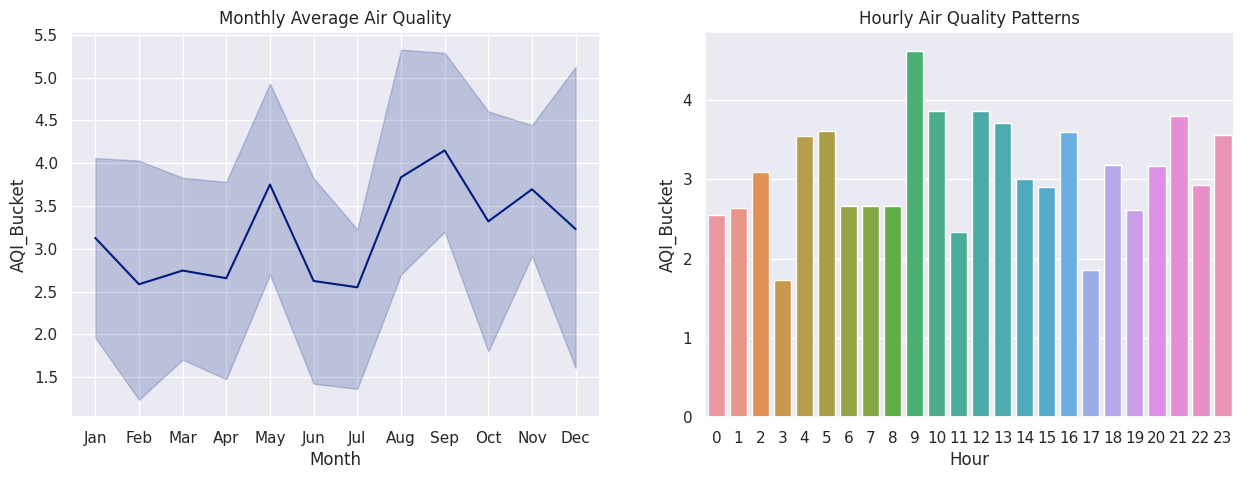

In [81]:
monthly_avg = df.groupby(['Year', 'Month'])['AQI_Bucket'].mean().reset_index() # by gorupby menthod
hourly_avg = df.groupby('Hour')['AQI_Bucket'].mean().reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.lineplot(x='Month', y='AQI_Bucket', data=monthly_avg)
plt.title("Monthly Average Air Quality")
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])

plt.subplot(1,2,2)
sns.barplot(x="Hour", y="AQI_Bucket", data=hourly_avg)
plt.title("Hourly Air Quality Patterns")



<ipython-input-82-4f469e38b1b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

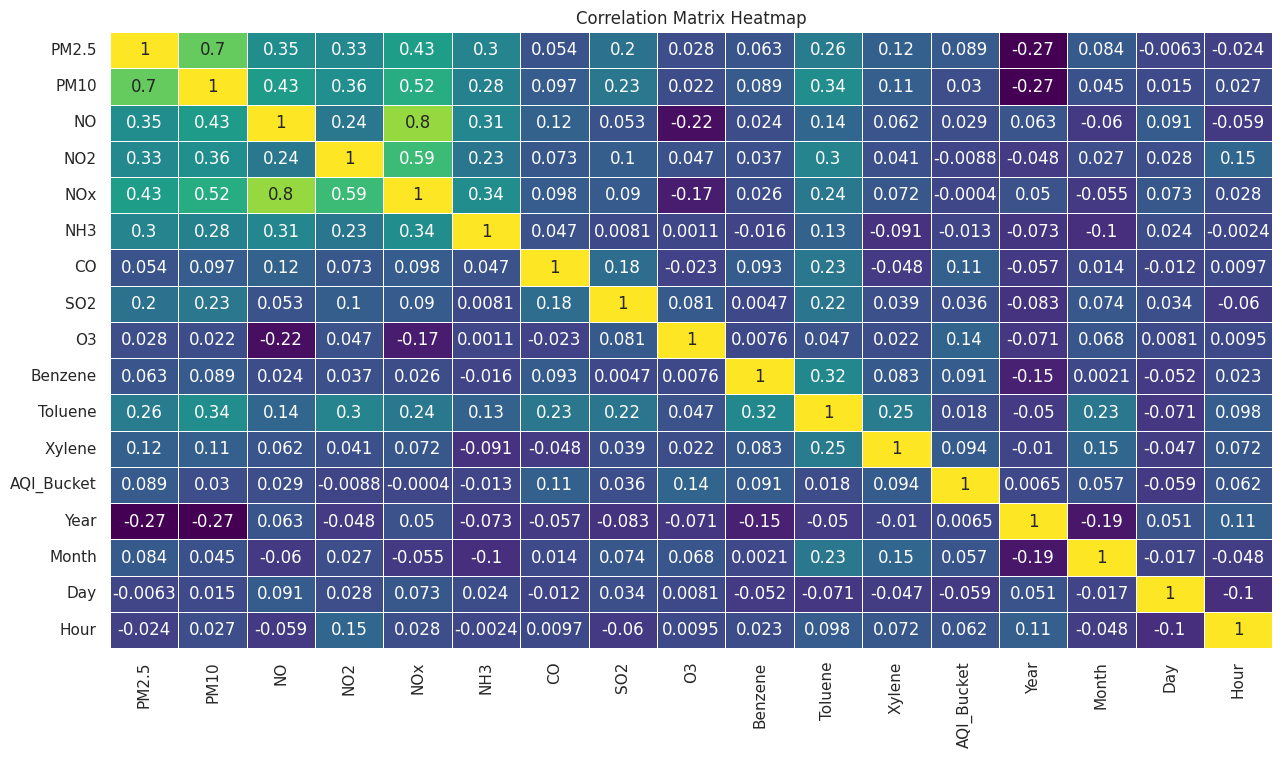

In [82]:

correlation_matrix = df.corr() # finding coreltion betwwen all columns
plt.figure(figsize=(15, 8))

sns.set(style="darkgrid")
sns.set_palette("dark")
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=0.5, cbar=False)
plt.title("Correlation Matrix Heatmap")

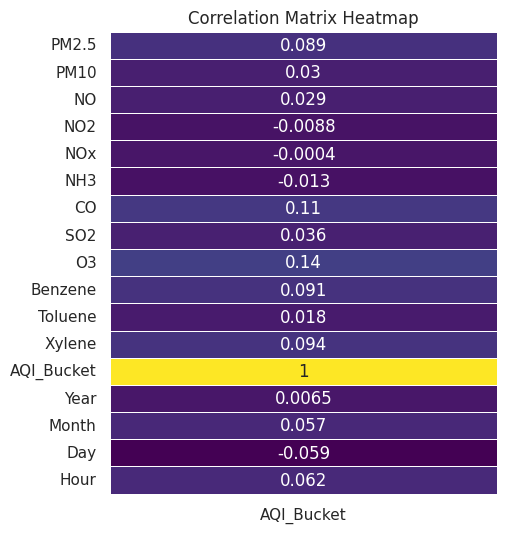

In [83]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 6))  # Set the figure size
sns.heatmap(correlation_matrix[['AQI_Bucket']], annot=True, cmap="viridis", linewidths=0.5, cbar=False)
plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()

<Axes: xlabel='NO', ylabel='O3'>

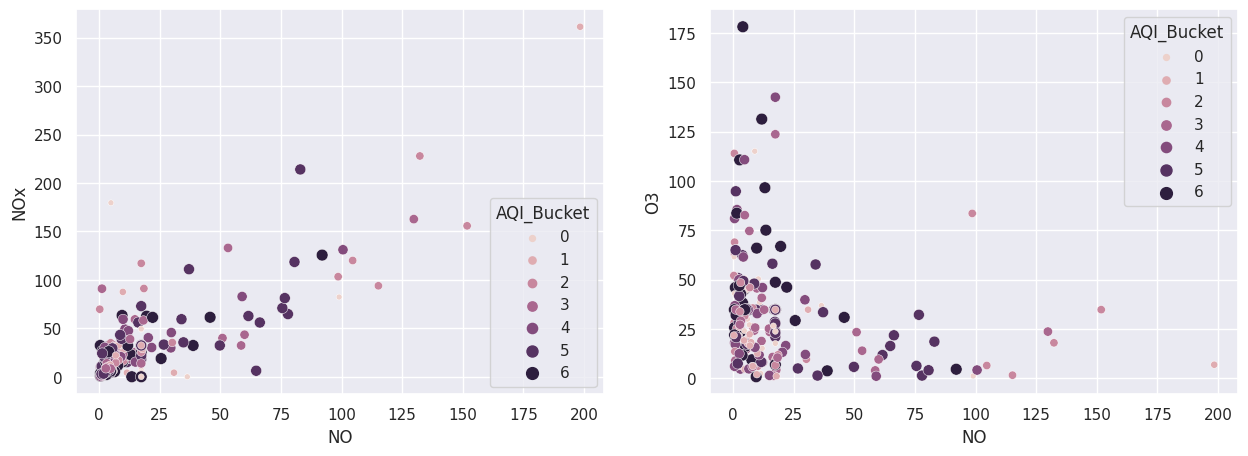

In [84]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.scatterplot(y=df['NOx'],x=df['NO'],hue=df['AQI_Bucket'],size=df['AQI_Bucket'])
plt.subplot(1,2,2)
sns.scatterplot(y=df['O3'],x=df['NO'],hue=df['AQI_Bucket'],size=df['AQI_Bucket'])

In [85]:
#sns.pairplot(df, diag_kind="kde", hue="AQI_Bucket")

# **Skewness and Normlaization**

In [86]:
df.skew()

<ipython-input-86-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PM2.5          3.736473
PM10           1.776554
NO             3.420528
NO2            5.782236
NOx            3.974168
NH3            3.002169
CO            12.563817
SO2            5.011781
O3             2.071430
Benzene       14.198384
Toluene        4.039373
Xylene         3.087387
AQI_Bucket    -0.132105
Year          -0.825943
Month          0.141175
Day            0.087023
Hour          -0.130335
dtype: float64

In [87]:
def Plotting(features):

    plt.figure(figsize=(15,5))

    #BOX PLOT
    plt.subplot(1,3,1)
    plt.xlabel('X Label')
    sns.boxplot(data= df, x= features, color='red').set(title="Box Plot for "+features)

    #HISTPLOT
    plt.subplot(1,3,2)
    sns.histplot(df[features], kde=True, color='blue', element="poly").set(title="Histogram for " + features)

    #PROBABILITY PLOT
    plt.subplot(1,3,3)
    plt.title('Probability Plot for' + features)
    sp.stats.probplot(df[features], plot=plt)



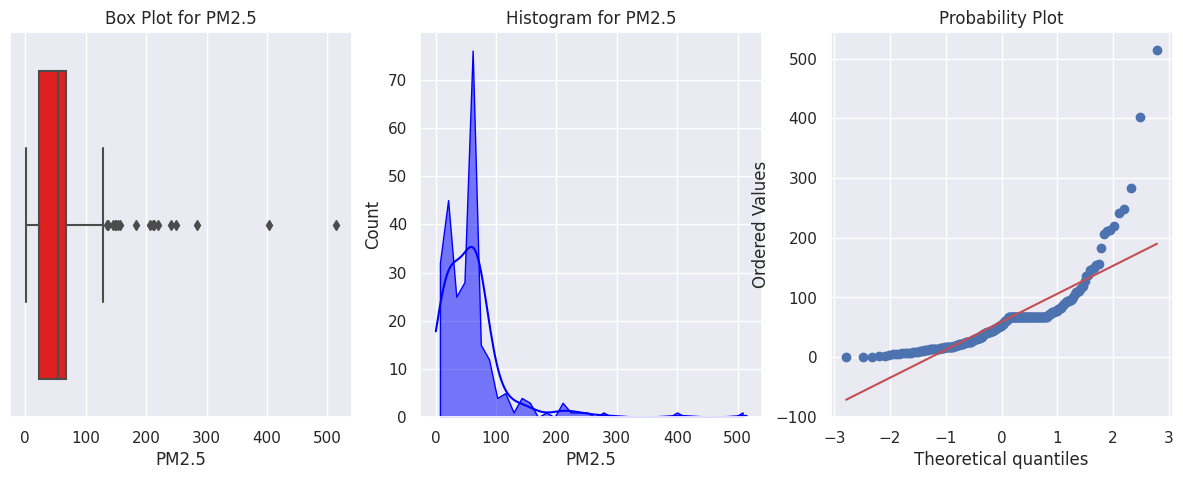

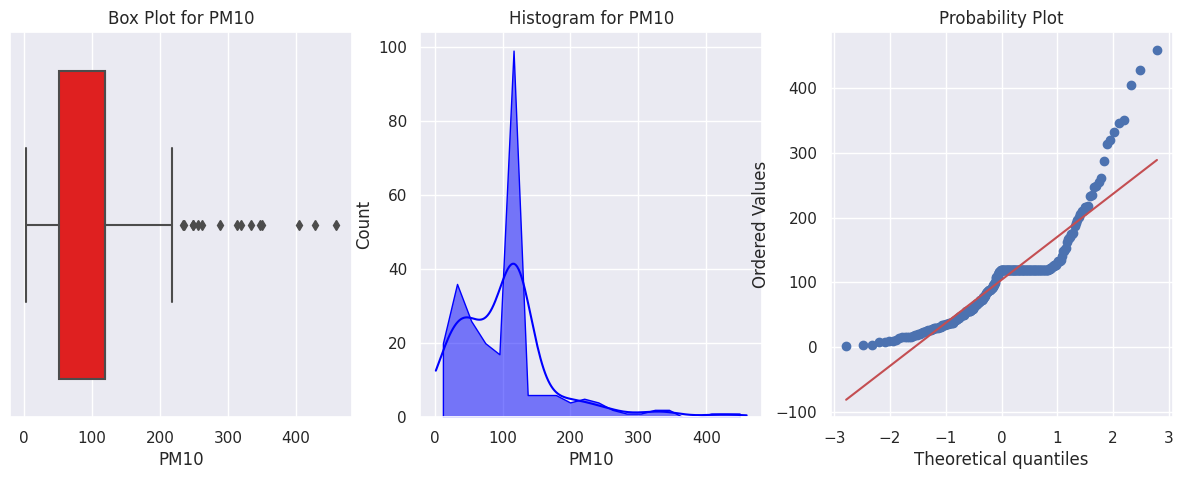

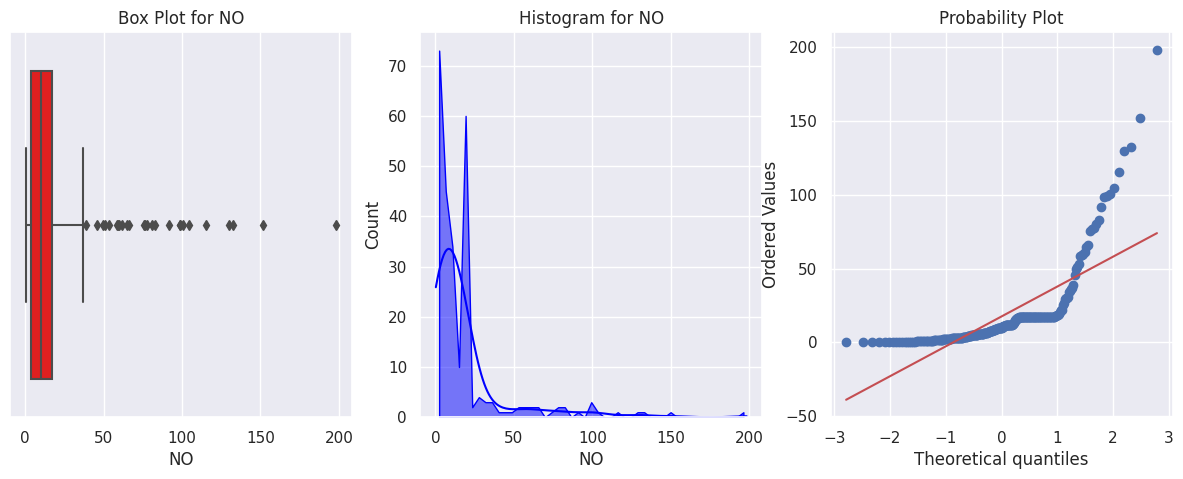

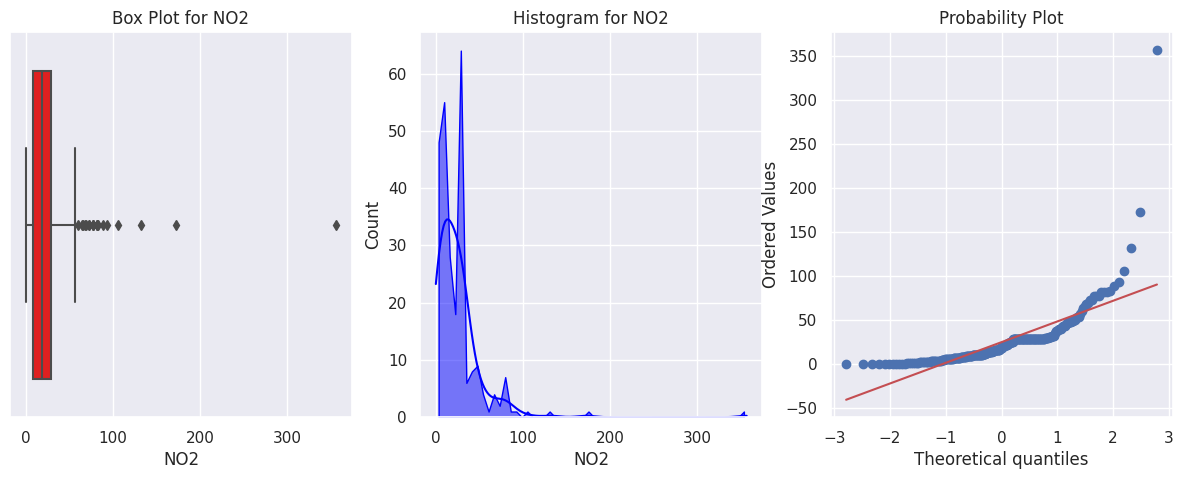

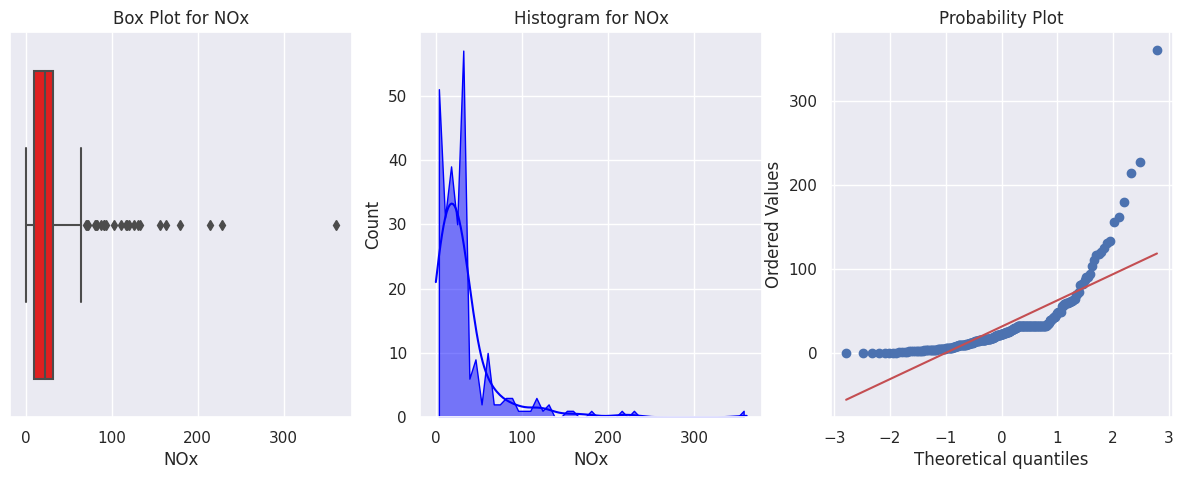

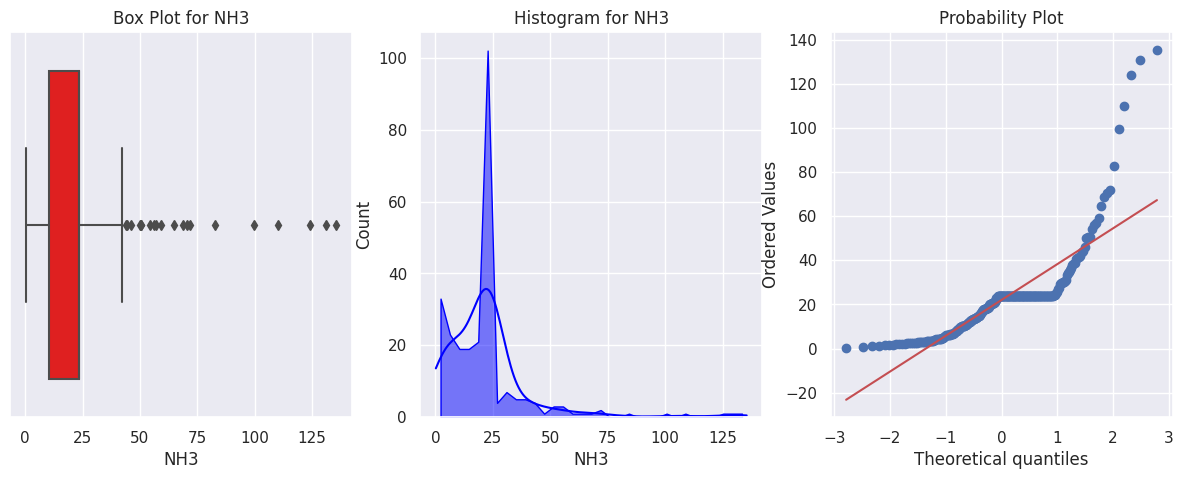

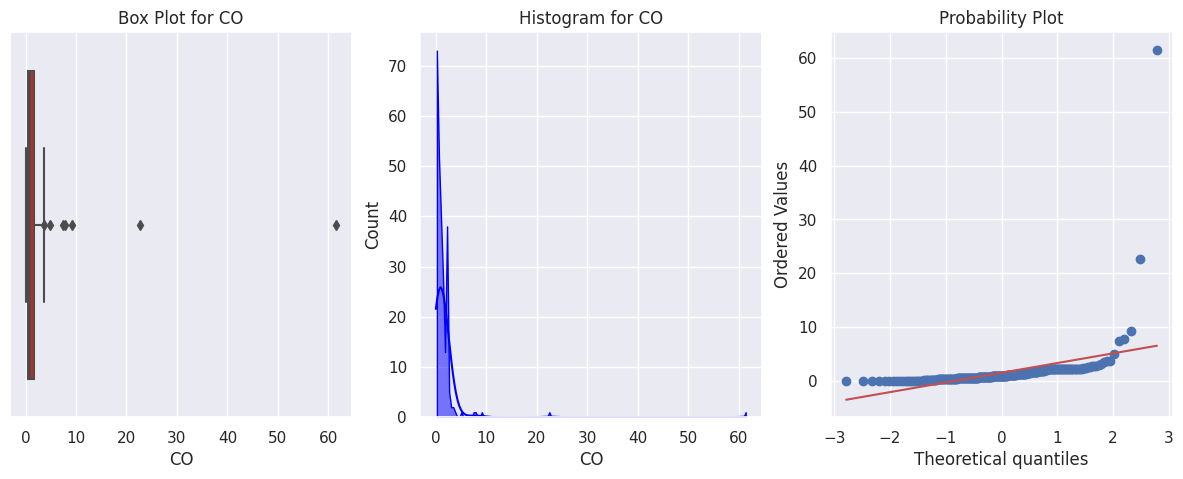

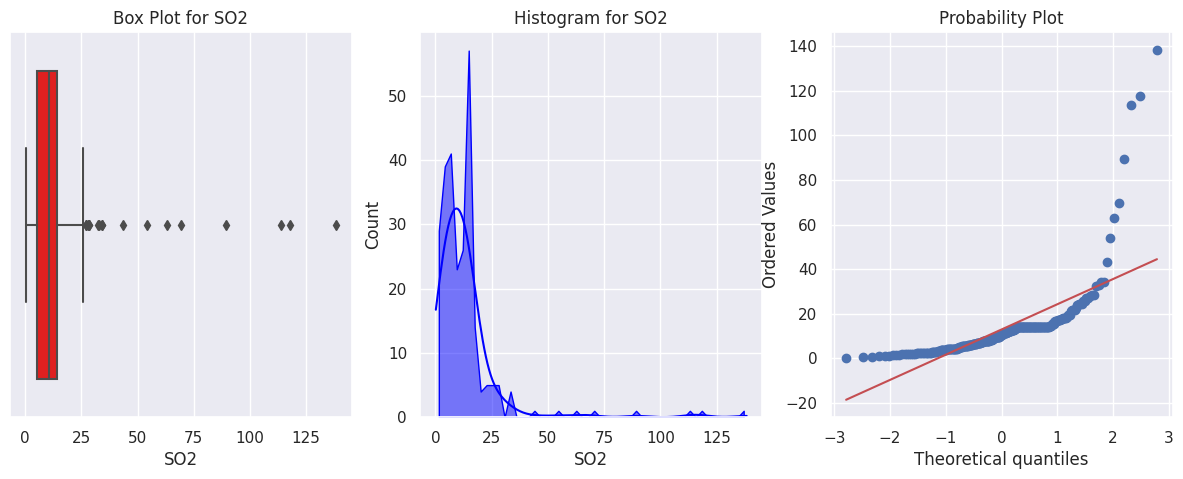

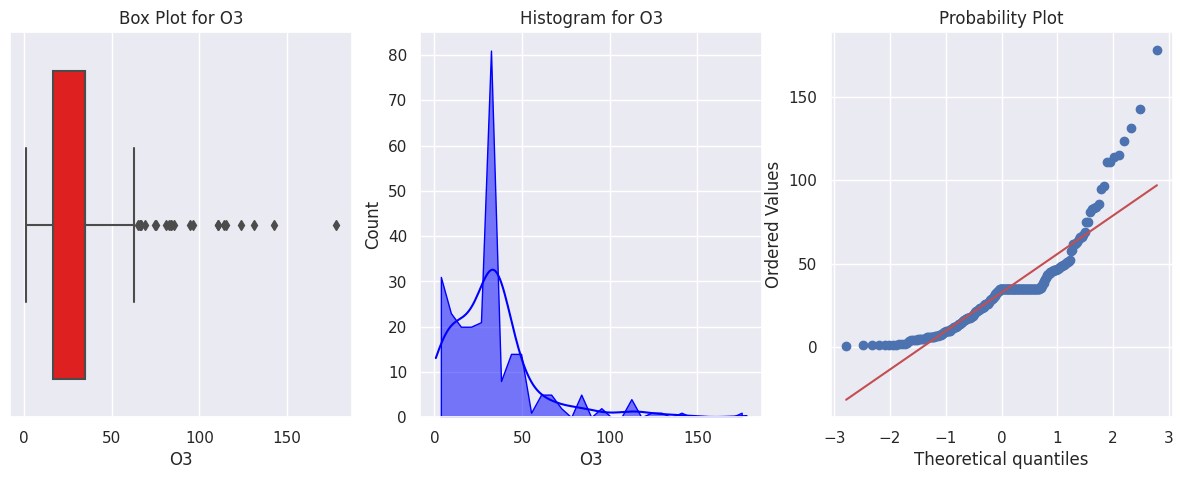

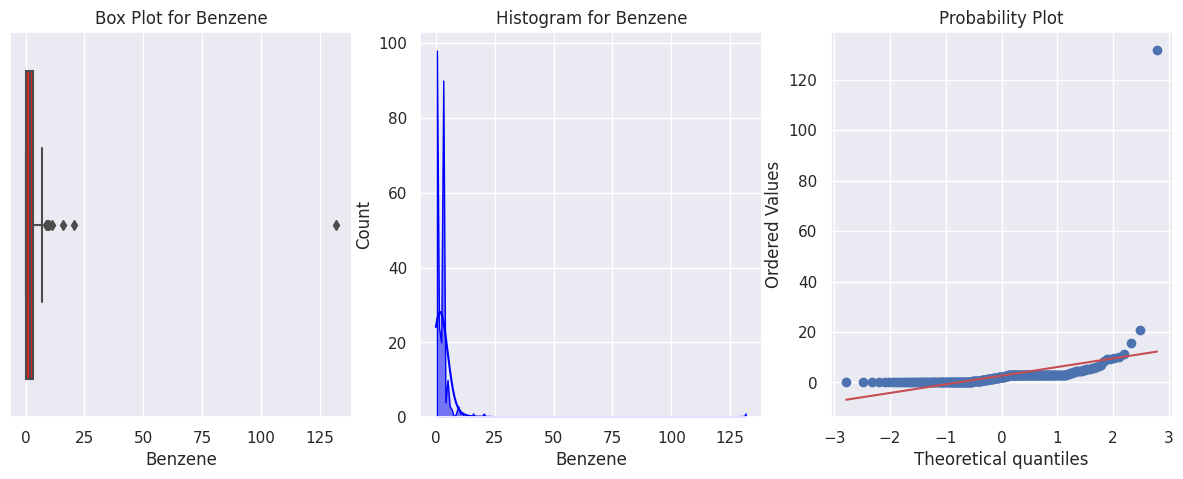

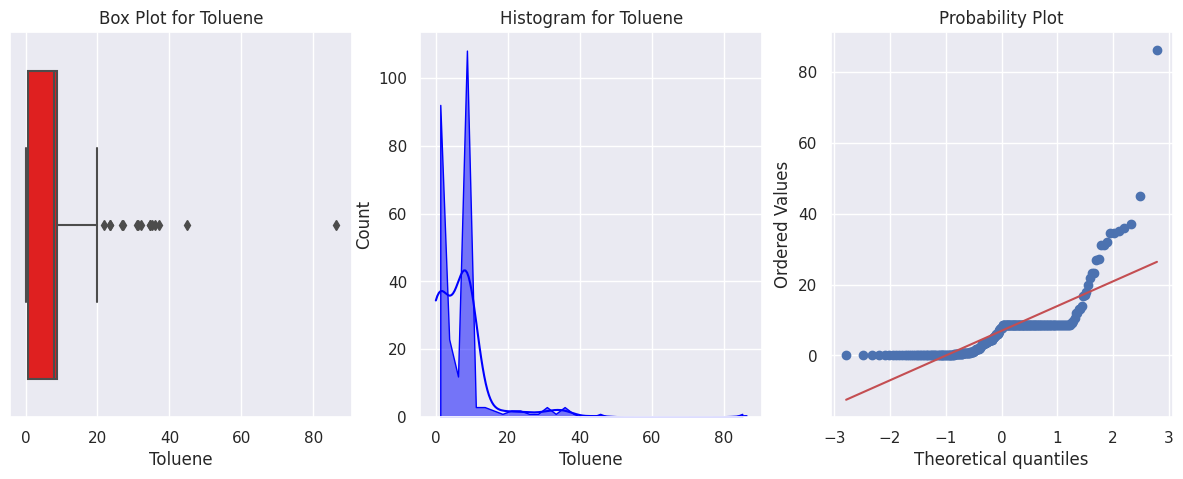

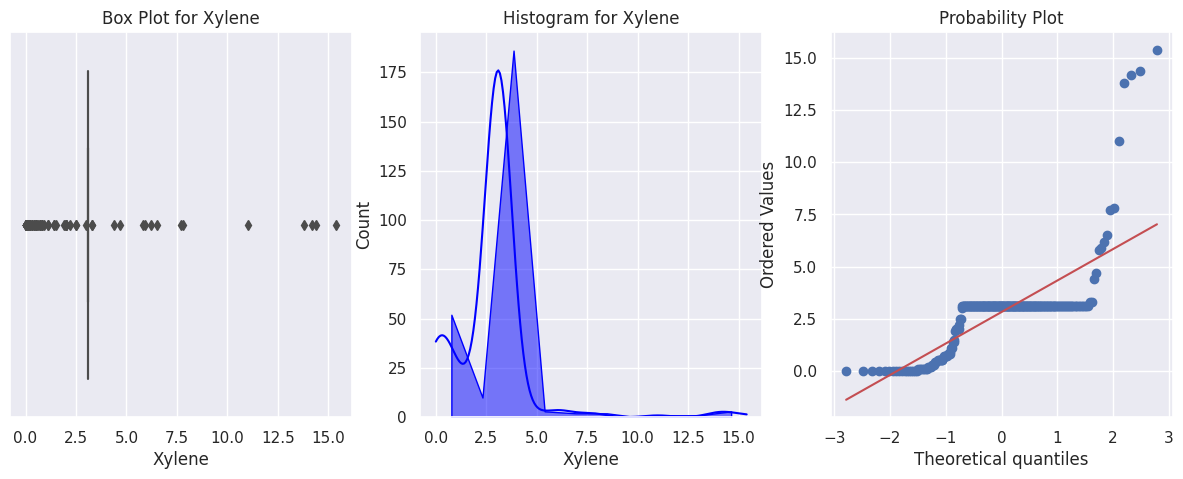

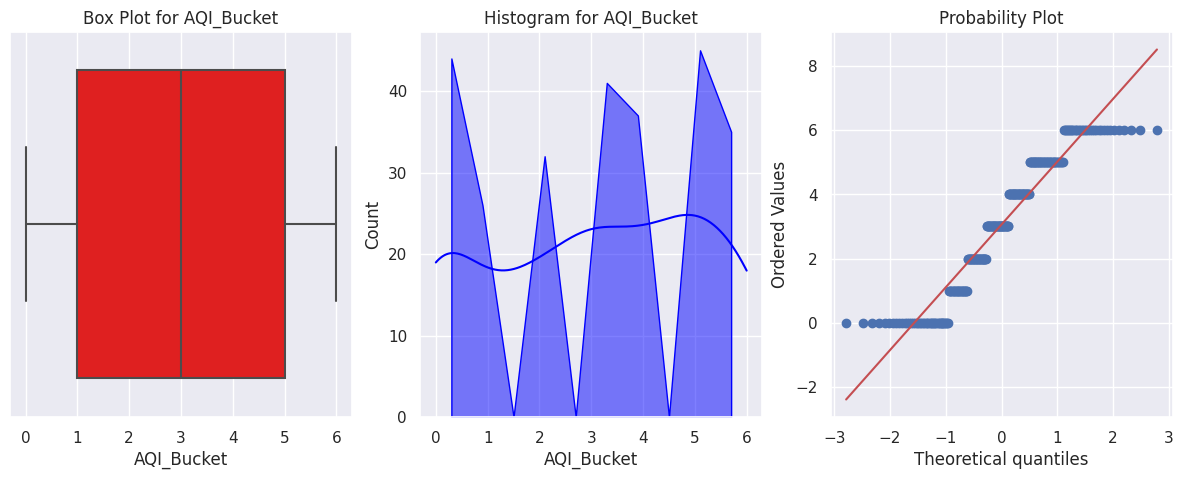

In [88]:
#beforing Normaling the Features

for j in features:
        Plotting(j)

In [89]:
lambdaList = {}
for column in features:
    # Perform the Box-Cox transformation
    transformed_data, lambda_val = stats.boxcox(df[column] + 1)  # Adding 1 to avoid zero values
    lambdaList[column] = lambda_val
    df[column] = transformed_data


In [108]:
lambdaList

{'PM2.5': 0.228850044621929,
 'PM10': 0.3784306192807244,
 'NO': -0.06239116793656803,
 'NO2': 0.17334152228094482,
 'NOx': 0.13224403576793106,
 'NH3': 0.24013180252232177,
 'CO': -0.6722351409028531,
 'SO2': -0.05947462290516178,
 'O3': 0.3443353348262985,
 'Benzene': -0.21638150710197543,
 'Toluene': 0.10932050143949244,
 'Xylene': 0.3587035765717658,
 'AQI_Bucket': 0.8236808129506861}

In [90]:
df.skew()

<ipython-input-90-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PM2.5         0.050411
PM10          0.021827
NO            0.007757
NO2           0.019850
NOx           0.015702
NH3           0.031282
CO            0.011979
SO2          -0.011742
O3            0.014891
Benzene       0.014350
Toluene      -0.030328
Xylene        0.142259
AQI_Bucket   -0.248229
Year         -0.825943
Month         0.141175
Day           0.087023
Hour         -0.130335
dtype: float64

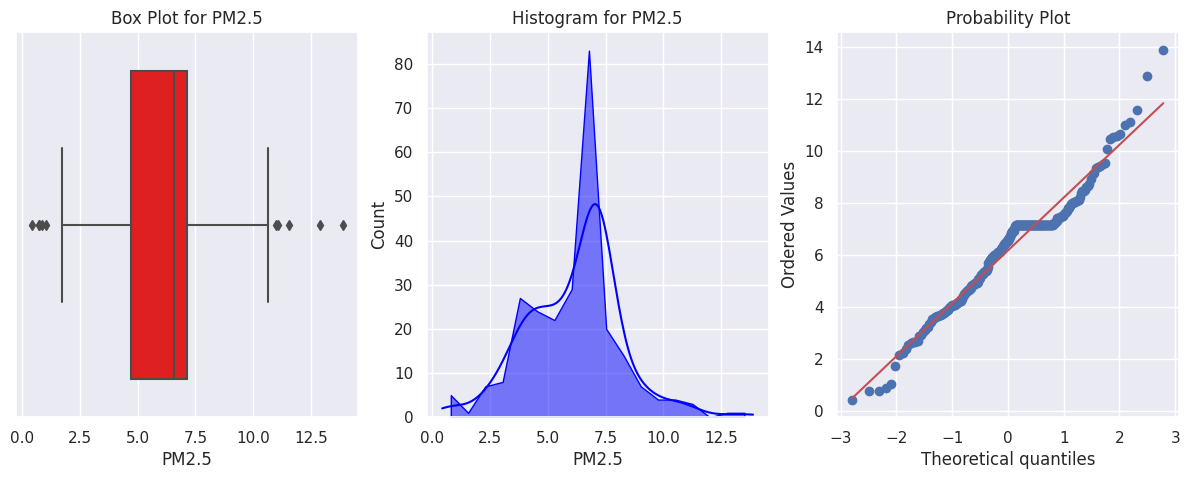

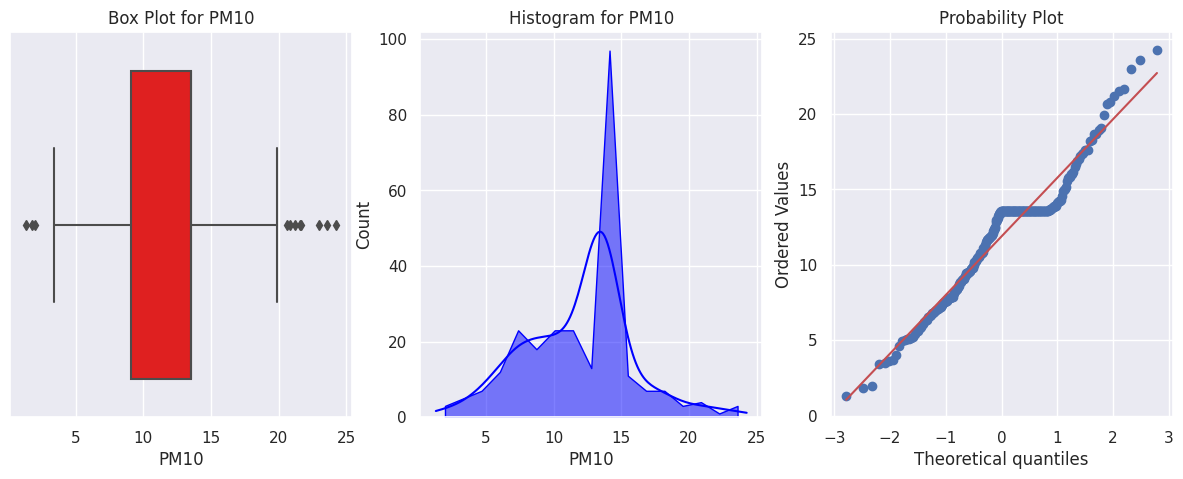

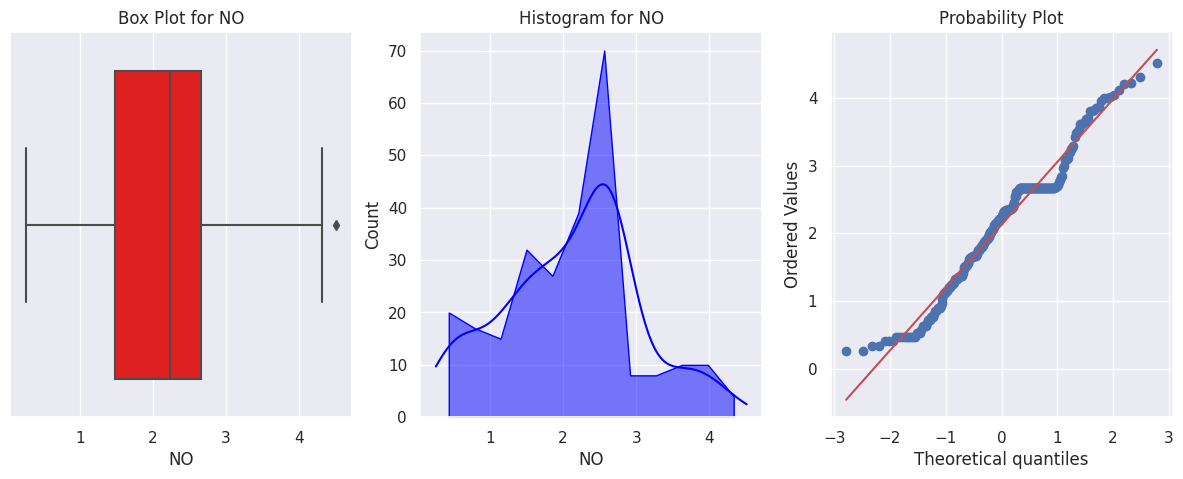

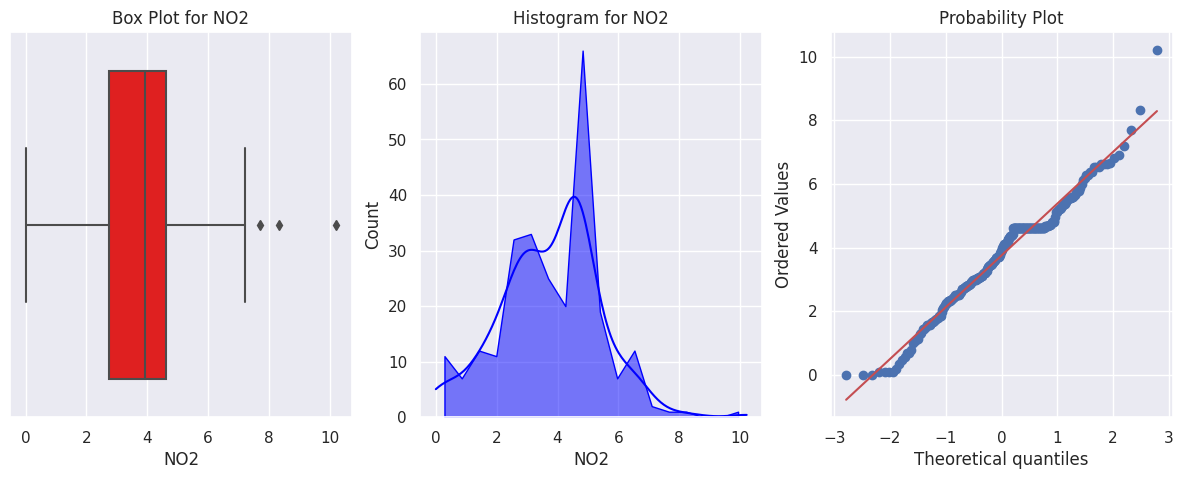

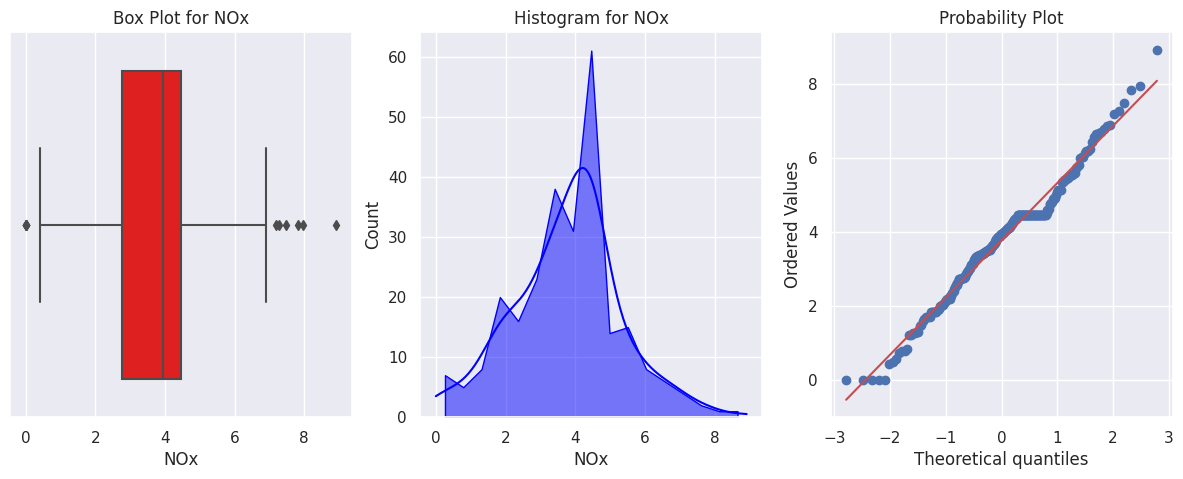

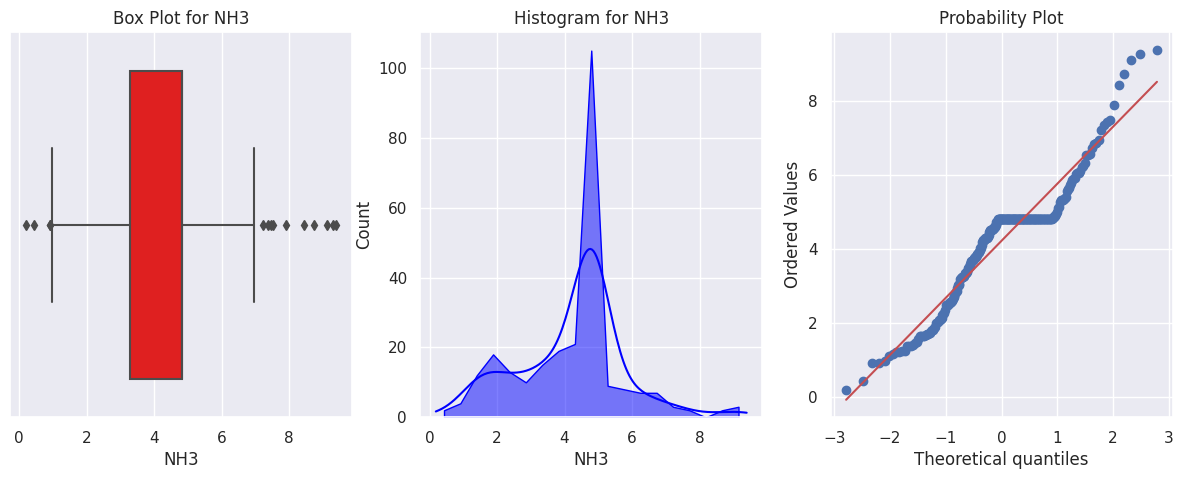

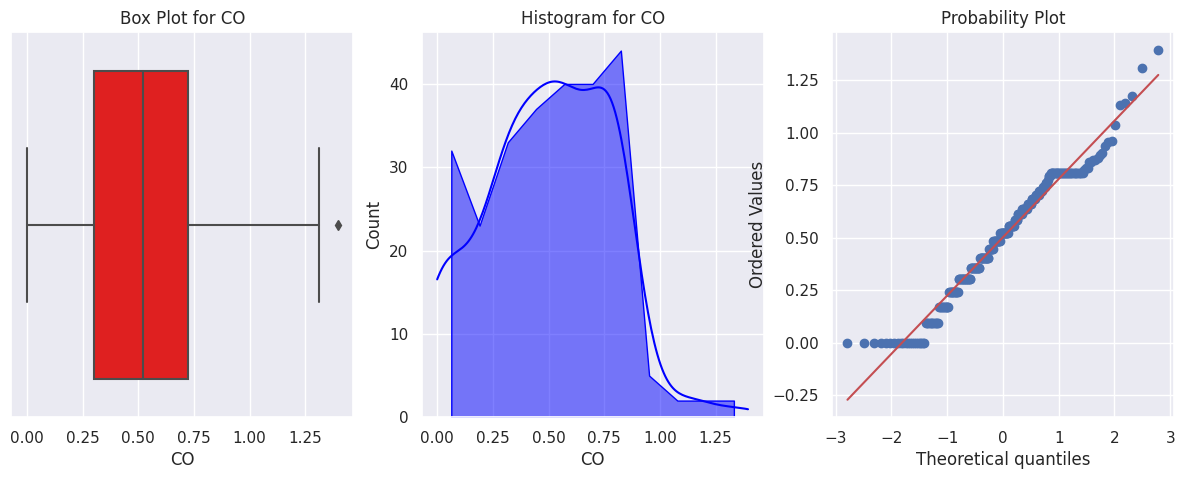

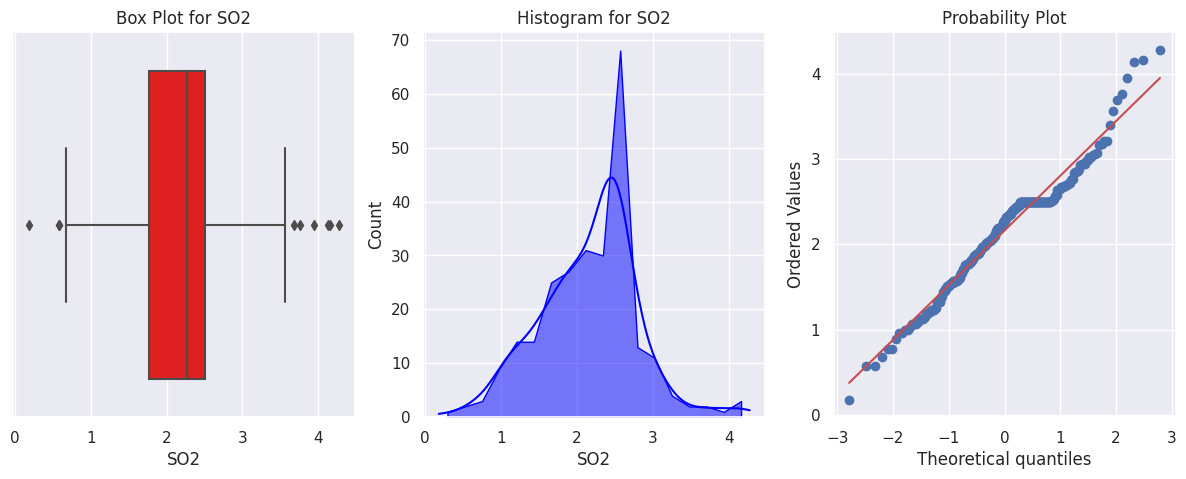

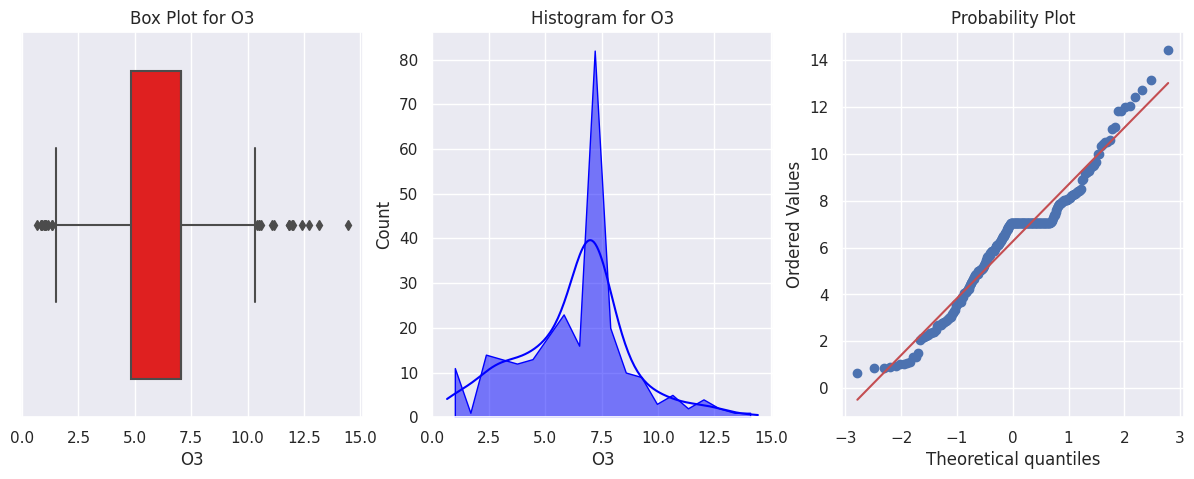

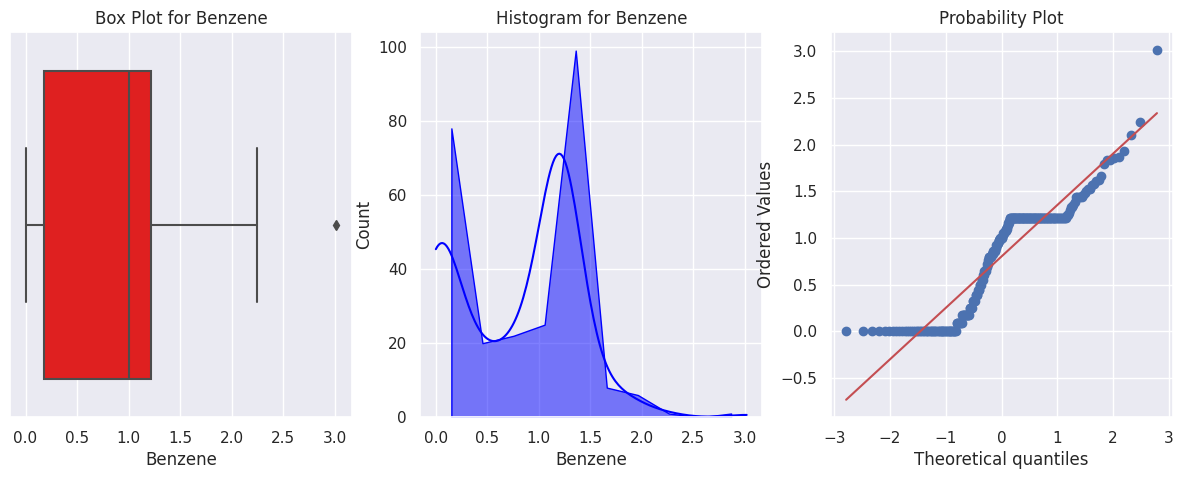

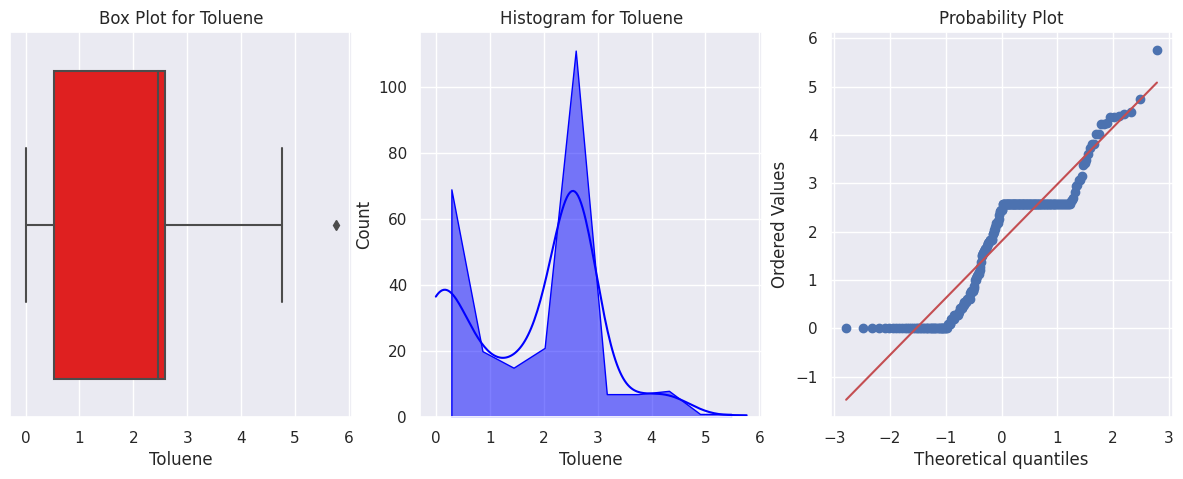

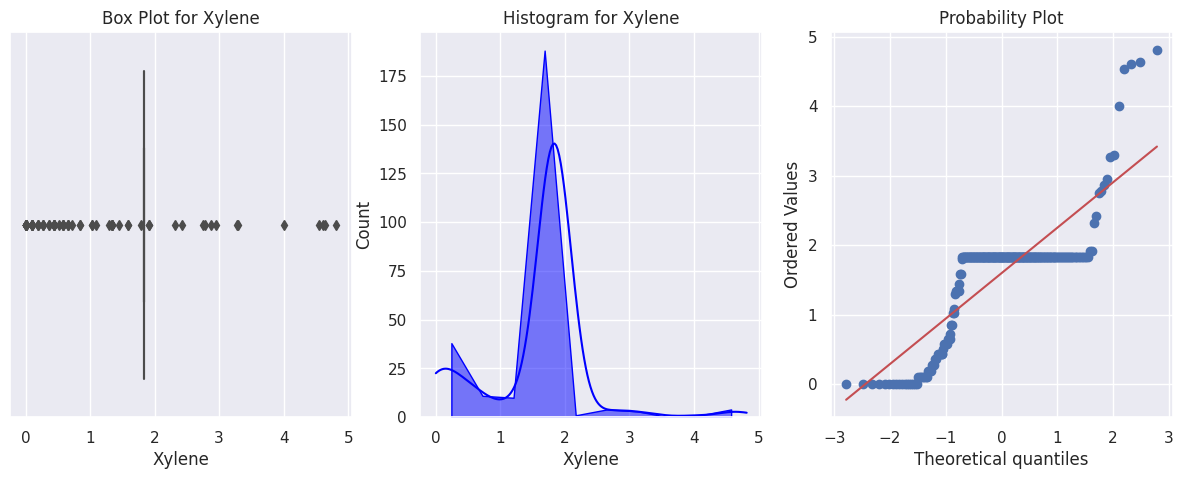

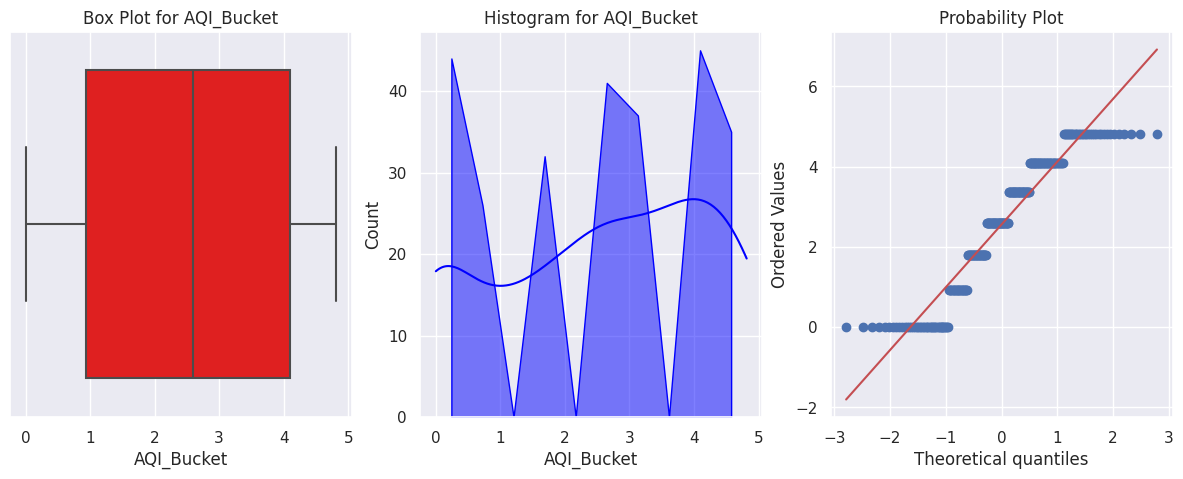

In [91]:
#after Normaling the Features

for j in features:
        Plotting(j)

In [92]:
df.skew()

<ipython-input-92-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


PM2.5         0.050411
PM10          0.021827
NO            0.007757
NO2           0.019850
NOx           0.015702
NH3           0.031282
CO            0.011979
SO2          -0.011742
O3            0.014891
Benzene       0.014350
Toluene      -0.030328
Xylene        0.142259
AQI_Bucket   -0.248229
Year         -0.825943
Month         0.141175
Day           0.087023
Hour         -0.130335
dtype: float64

In [93]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,Year,Month,Day,Hour
0,Ahmedabad,2020-01-04 13:00:00,7.068226,13.902795,1.328034,3.013976,2.442057,4.821448,0.901770,3.022787,5.845017,1.159480,4.218241,1.581599,4.816143,2020,1,4,13
1,Ahmedabad,2020-05-23 21:00:00,5.520840,11.790383,1.121948,5.557094,4.072668,4.821448,0.806963,2.501222,8.013854,1.831362,4.474882,2.416926,2.589113,2020,5,23,21
2,Ahmedabad,2017-08-14 10:00:00,7.130168,13.537432,2.663080,4.627669,4.459706,4.821448,0.806963,2.501222,7.051633,1.215937,2.579203,1.836760,3.356496,2017,8,14,10
3,Ahmedabad,2016-03-23 02:00:00,7.130168,13.537432,2.663080,4.627669,4.459706,4.821448,0.806963,2.501222,7.051633,1.215937,2.579203,1.836760,0.000000,2016,3,23,2
4,Ahmedabad,2019-12-02 04:00:00,6.109352,10.772852,1.415188,5.316884,4.042830,4.821448,0.938126,4.278468,8.077761,1.159480,4.395033,1.296581,1.786735,2019,12,2,4


## **Hyothesis Testing**

In [94]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,Year,Month,Day,Hour
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,6.159823,11.887273,2.125673,3.758021,3.770898,4.229291,0.501568,2.163388,6.262215,0.802539,1.802425,1.597941,2.556756,2018.430769,6.188462,15.492308,12.173077
std,2.057685,3.955115,0.934171,1.634496,1.550670,1.592503,0.279624,0.645955,2.456450,0.584027,1.247410,0.785286,1.625275,1.498717,3.329849,8.869928,7.282817
min,0.424872,1.311167,0.260229,0.000000,0.000000,0.186372,0.000000,0.181337,0.651494,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000
25%,4.720204,9.129396,1.489526,2.738128,2.767702,3.274387,0.301133,1.771374,4.842342,0.178772,0.530312,1.836760,0.934726,2018.000000,4.000000,7.000000,5.000000
50%,6.569839,13.537432,2.231039,3.910756,3.934232,4.821448,0.521322,2.273248,7.051633,1.003553,2.455035,1.836760,2.589113,2019.000000,6.000000,15.000000,13.000000
75%,7.130168,13.537432,2.663080,4.627669,4.459706,4.821448,0.724616,2.501222,7.065971,1.215937,2.579203,1.836760,4.097097,2020.000000,9.000000,23.000000,19.000000
max,13.878514,24.257631,4.509452,10.216616,8.921570,9.395742,1.395369,4.278468,14.430793,3.017418,5.764911,4.816026,4.816143,2020.000000,12.000000,31.000000,23.000000


Hypothesis testing is a common statistical technique used to make inferences about population parameters, such as the population mean (μ) and variance (σ^2). There are two common scenarios for hypothesis testing related to the population mean:

Hypothesis Testing for μ with Known Population Variance (σ^2):

Null Hypothesis (H0): μ = μ0 (a specific hypothesized value for the population mean).
Alternative Hypothesis (H1): μ ≠ μ0 or μ > μ0 or μ < μ0 (depending on your research question).
Test Statistic: z-score
Common test: Z-test.
Hypothesis Testing for μ with Unknown Population Variance (σ^2):

Null Hypothesis (H0): μ = μ0 (a specific hypothesized value for the population mean).
Alternative Hypothesis (H1): μ ≠ μ0 or μ > μ0 or μ < μ0 (depending on your research question).
Test Statistic: t-statistic
Common test: Student's t-test.
Here's a Python function that can accept the population mean (μ0), alpha (α) significance level, data array (arr), and the type of test (t-test or z-test) and uses SciPy's stats module to perform the hypothesis test and determine whether to reject the null hypothesis or not:

In [101]:
df['PM2.5'].mean()

6.159823100448004

In [95]:
def hypothesis_test(mu0, alpha, data, test_type="t"):
    if test_type == "t" and len(data) >= 25:
        print('performing z test because data is suffiecently large')
        z_stat = (data.mean() - mu0) / (data.std() / (len(data)**0.5))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    elif test_type == "z":
        print('performing z test')
        z_stat = (data.mean() - mu0) / (data.std() / (len(data)**0.5))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    elif test_type == "t":
        print('performing t test')
        t_stat, p_value = stats.ttest_1samp(data, mu0)

    if p_value < alpha:
        print("Reject the null hypothesis (H0)")
    else:
        print("Do not reject the null hypothesis (H0)")

alpha = 0.01
mu0 = 6

# Perform a t-test ( n = 260, so it will perform z test only)
hypothesis_test(mu0, alpha, df['PM2.5'], test_type="t")

# Perform a z-test (assuming known population variance)
hypothesis_test(mu0, alpha, df['PM2.5'], test_type="z")


performing z test because data is suffiecently large
Do not reject the null hypothesis (H0)
performing z test
Do not reject the null hypothesis (H0)


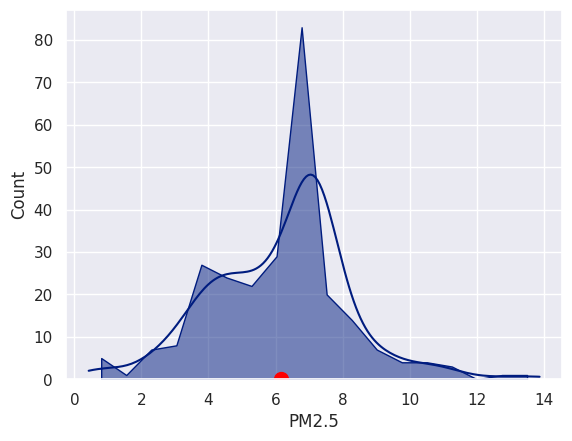

In [99]:
sns.histplot(df, x="PM2.5", kde = 'True', element="poly")
plt.scatter(df['PM2.5'].mean(), 0, color='red', marker='o', s=100)
alpha_value = 0.01


hypothesis tests for population variance (σ^2) under two different scenarios: one where the population mean (μ) is known, and another where the population mean is unknown.

Hypothesis Testing for σ^2 with Known Population Mean (μ):

Null Hypothesis (H0): σ^2 = σ0^2 (a specific hypothesized value for the population variance).
Alternative Hypothesis (H1): σ^2 ≠ σ0^2 or σ^2 > σ0^2 or σ^2 < σ0^2 (depending on your research question).


In [97]:
df['NO'].var()

0.8726753523731399

In [107]:


def variance_hypothesis_test(data, sigma0_squared, alpha):
    n = len(data)
    sample_variance = ((data - data.mean())**2).sum() / (n - 1)

    # Hypothesis Testing for σ^2 with Known Population Mean
    chi_squared_stat = (n - 1) * sample_variance / sigma0_squared
    p_value = 1 - stats.chi2.cdf(chi_squared_stat, df=n - 1)


    # Compare the p-value to the significance level alpha
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Do not reject the null hypothesis")

alpha = 0.05
sigma0_squared = 0.6

variance_hypothesis_test(df['NO'], sigma0_squared, alpha)



Reject the null hypothesis


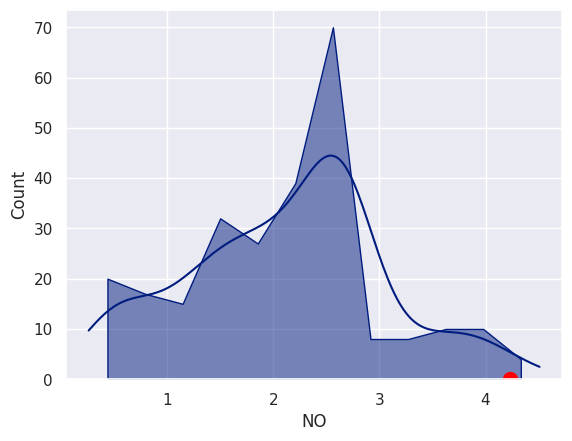

In [105]:
sns.histplot(df, x="NO", kde = 'True', element="poly")
plt.scatter(df['PM2.5'].var(), 0, color='red', marker='o', s=100)
alpha_value = 0.01